In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Code for Jupyter Notebook to show plot
%matplotlib inline

import data from<br/>
https://covid.ourworldindata.org/data/owid-covid-data.csv

In [2]:
# read data from source
data_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df=pd.read_csv(data_url)
# print the first five records to check the data
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [3]:
# the date column in the raw data is string, which needs to be translated to a datetime type
df['date'] = pd.to_datetime(df.date)
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [4]:
# List all the covered countries
df.location.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Western Sahara', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'Falkland Islands', 'France',

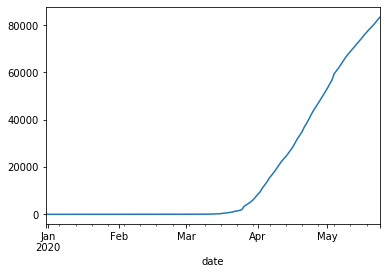

In [5]:
ca = ca = df.loc[(df['location'] == 'Canada')]
ca.set_index('date', inplace=True)
ca['total_cases'].plot(kind='line')
plt.show()

In [6]:
# extract Canadian data, only select the days with positive total cases
ca = df.loc[(df['location'] == 'Canada') & (df['total_cases'] > 0)]
# only keep the date and total_cases
ca = ca[['date', 'total_cases']]
# talke the log of total_cases at each date
ca['ca_log_cases'] = np.log(ca['total_cases'])
# populate the first date when total_case is 1
ca['first_case'] = ca.loc[ca['total_cases'] == 1].iloc[0]['date']
# calculate the accumulated days, use .dt.days to translate data into integer
ca['days'] = (ca['date'] - ca['first_case']).dt.days
# drop three unnecessary columns
ca.drop(['first_case', 'date', 'total_cases'],axis=1, inplace=True)
# set days as index, this will be used to join all the datesets
ca.set_index('days', inplace=True)

# check the data
ca.head()

,ca_log_cases
days,
0,0.000000
1,0.000000
2,0.693147
3,1.098612
4,1.098612


In [7]:
us = df.loc[(df['location'] == 'United States') & (df['total_cases'] > 0)][['date', 'total_cases']]
us['us_log_cases'] = np.log(us['total_cases'])
us['first_case'] = us.loc[us['total_cases'] == 1].iloc[0]['date']
us['days'] = (us['date'] - us['first_case']).dt.days
us.drop(['first_case', 'date', 'total_cases'],axis=1, inplace=True)
us.set_index('days', inplace=True)
us.head()

,us_log_cases
days,
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.693147


In [8]:
it = df.loc[(df['location'] == 'Italy') & (df['total_cases'] > 0)][['date', 'total_cases']]
it['it_log_cases'] = np.log(it['total_cases'])
it['first_case'] = it.loc[it['total_cases'] == np.min(it['total_cases'])].iloc[0]['date']
it['days'] = (it['date'] - it['first_case']).dt.days
it.drop(['first_case', 'date', 'total_cases'],axis=1, inplace=True)
it.set_index('days', inplace=True)
it.head()

,it_log_cases
days,
0,1.098612
1,1.098612
2,1.098612
3,1.098612
4,1.098612


In [9]:
cn = df.loc[(df['location'] == 'China') & (df['total_cases'] > 0)][['date', 'total_cases']]
cn['cn_log_cases'] = np.log(cn['total_cases'])
cn['first_case'] = cn.loc[cn['total_cases'] == np.min(cn['total_cases'])].iloc[0]['date']
cn['days'] = (cn['date'] - cn['first_case']).dt.days
cn.drop(['first_case', 'date', 'total_cases'],axis=1, inplace=True)
cn.set_index('days', inplace=True)
cn.head()

,cn_log_cases
days,
0,3.295837
1,3.295837
2,3.295837
3,3.784190
4,3.784190


In [10]:
# combine all processed dataframes
df_to_plot = pd.concat([ca, us, cn, it], axis=1)
df_to_plot.head()

,ca_log_cases,us_log_cases,cn_log_cases,it_log_cases
days,,,,
0,0.000000,0.000000,3.295837,1.098612
1,0.000000,0.000000,3.295837,1.098612
2,0.693147,0.000000,3.295837,1.098612
3,1.098612,0.000000,3.784190,1.098612
4,1.098612,0.693147,3.784190,1.098612


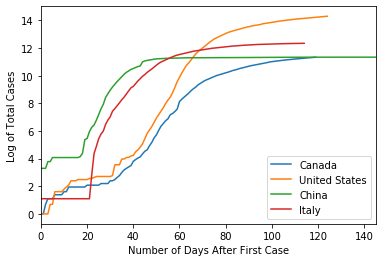

In [11]:
# plot data in line
df_to_plot.plot(kind='line',
                y=['ca_log_cases','us_log_cases','cn_log_cases','it_log_cases'])
# change default legend tags
plt.legend(['Canada', 'United States','China','Italy'])
# add x axis title
plt.xlabel('Number of Days After First Case')
# add y axis title
plt.ylabel('Log of Total Cases')
# show plot
plt.show()

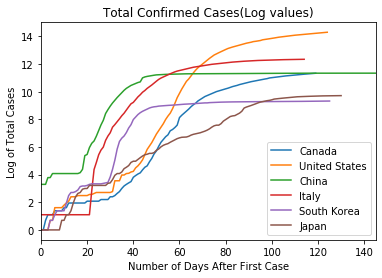

In [12]:
def calc_log(df, country):
    tmp = df.loc[(df['location'] == country) & (df['total_cases'] > 0)][['date', 'total_cases']]
    tmp['log_cases'] = np.log(tmp['total_cases'])
    tmp['first_case'] = tmp.loc[tmp['total_cases'] == np.min(tmp['total_cases'])].iloc[0]['date']
    tmp['days'] = (tmp['date'] - tmp['first_case']).dt.days
    tmp.drop(['first_case', 'date', 'total_cases'],axis=1, inplace=True)
    tmp.set_index('days', inplace=True)

    return tmp

def plot(df_to_plot, legend):
    # plot data in line
    df_to_plot.plot(kind='line')
    # change default legend tags
    plt.legend(legend)
    # add x axis title
    plt.xlabel('Number of Days After First Case')
    # add y axis title
    plt.ylabel('Log of Total Cases')
    #add title
    plt.title("""Total Confirmed Cases(Log values)""")
    # show plot
    plt.show()

cn = calc_log(df, 'China')
us = calc_log(df, 'United States')
ca = calc_log(df, 'Canada')
it = calc_log(df, 'Italy')
sk = calc_log(df, 'South Korea')
jp = calc_log(df, 'Japan')

df_to_plot = pd.concat([ca, us, cn, it, sk, jp], axis=1)


plot(df_to_plot, ['Canada', 'United States', 'China', 'Italy', 'South Korea', 'Japan'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


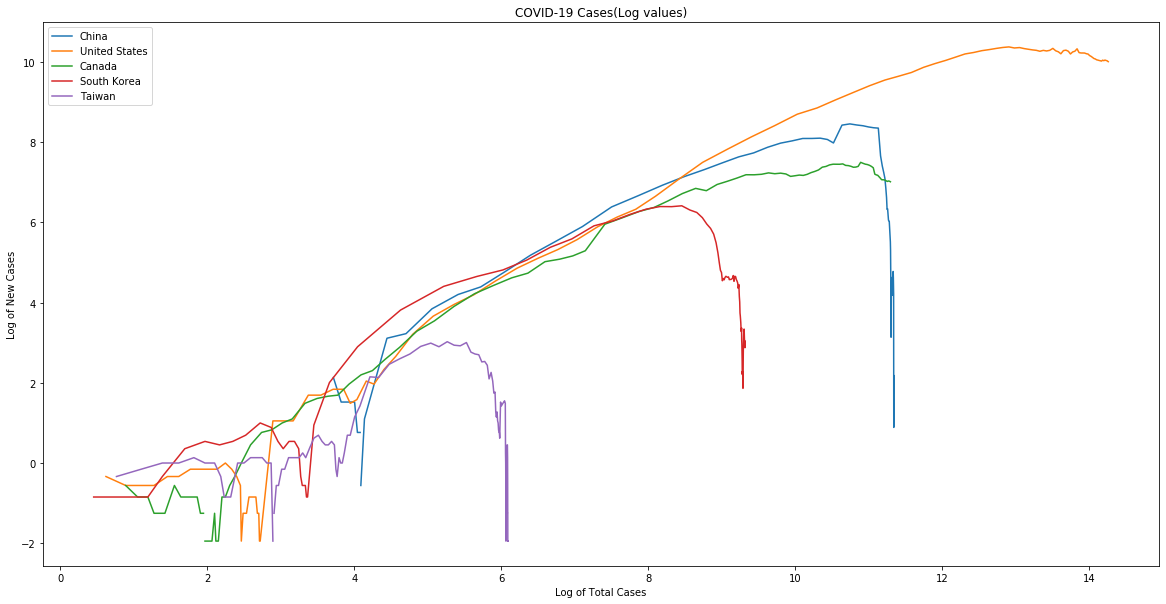

In [13]:
def two_way_log(df, country):
    tmp = df.loc[(df['location'] == country) & (df['total_cases'] > 0)][['date', 'total_cases','new_cases']]
#     tmp['log_total_cases'] = np.log(tmp['total_cases'])
#     tmp['log_new_cases'] = np.log(tmp['new_cases'])
#     moving average
    tmp['log_total_cases'] = np.log(tmp['total_cases'].rolling(7).mean())
    tmp['log_new_cases'] = np.log(tmp['new_cases'].rolling(7).mean())
    tmp['first_case'] = tmp.loc[tmp['total_cases'] == np.min(tmp['total_cases'])].iloc[0]['date']
    tmp['days'] = (tmp['date'] - tmp['first_case']).dt.days
    tmp.drop(['first_case', 'date', 'total_cases', 'new_cases'],axis=1, inplace=True)
    tmp.set_index('days', inplace=True)

    return tmp

cn_2 = two_way_log(df, 'China')
us_2 = two_way_log(df,'United States')
ca_2 = two_way_log(df,'Canada')
sk_2 = two_way_log(df,'South Korea')
tw_2 = two_way_log(df,'Taiwan')

plt.figure(figsize=(20,10))
plt.xlabel('Log of Total Cases')
plt.ylabel('Log of New Cases')
plt.title("""COVID-19 Cases(Log values)""")

plt.plot(cn_2.log_total_cases, cn_2.log_new_cases)
plt.plot(us_2.log_total_cases, us_2.log_new_cases)
plt.plot(ca_2.log_total_cases, ca_2.log_new_cases)
plt.plot(sk_2.log_total_cases, sk_2.log_new_cases)
plt.plot(tw_2.log_total_cases, tw_2.log_new_cases)
plt.legend(['China', 'United States', 'Canada', 'South Korea', 'Taiwan'])
plt.show()